In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Navent Dataset
### Analisis de las postulaciones del dataset de Navent

In [ ]:
#cargo archivo csv de la educacion de los postulantes
p_educacion = pd.read_csv('../data/fiuba_1_postulantes_educacion.csv')
p_educacion.head()

In [2]:
#cargo archivo csv del genero y edad de los postulantes
p_genero_edad = pd.read_csv('../data/fiuba_2_postulantes_genero_y_edad.csv')
p_genero_edad.head()

,idpostulante,fechanacimiento,sexo
0,NM5M,1970-12-03,FEM
1,5awk,1962-12-04,FEM
2,ZaO5,1978-08-10,FEM
3,NdJl,1969-05-09,MASC
4,eo2p,1981-02-16,MASC


In [ ]:
#cargo archivo csv de las vistas
visitas = pd.read_csv('../data/fiuba_3_vistas.csv')
visitas.head()

In [3]:
#cargo csv de postulaciones
postulaciones = pd.read_csv('../data/fiuba_4_postulaciones.csv')
postulaciones.head()

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34
1,1111920714,NM5M,2018-02-06 09:04:50
2,1112346945,NM5M,2018-02-22 09:04:47
3,1112345547,NM5M,2018-02-22 09:04:59
4,1112237522,5awk,2018-01-25 18:55:03


In [ ]:
#cargo csv de avisos
avisos_online = pd.read_csv('../data/fiuba_5_avisos_online.csv')
avisos_online.head()

In [4]:
#cargo csv de detalle de avisos
avisos_detalle = pd.read_csv('../data/fiuba_6_avisos_detalle.csv')
avisos_detalle.head()

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
3,1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL


# Vista rapida de datos

In [ ]:
avisos_detalle.shape

In [ ]:
#columnas ciudad y mapacalle no deberian ser usadas, demasiados elementos null
avisos_detalle.isnull().sum()

In [ ]:
avisos_detalle.info()

In [ ]:
postulaciones.shape

In [ ]:
postulaciones.isnull().sum()

In [ ]:
postulaciones.info()

In [ ]:
visitas.shape

In [ ]:
visitas.isnull().sum()

In [ ]:
visitas.info()

In [ ]:
p_educacion.shape

In [ ]:
p_educacion.isnull().sum()

In [ ]:
p_educacion.info()

In [ ]:
p_genero_edad.shape

In [ ]:
p_genero_edad.isnull().sum()

In [ ]:
p_genero_edad.info()

# Limpieza de datos
En esta seccion limpiaremos los datos y los dejaremos preparados para el análisis. Los pasos a seguir son:
- Convertir las fechas de postulaciones a datetime
- Limpiar los espacios en blanco y Nan de las fechas de nacimiento de los postulantes
- Los null de mapacalle y ciudad ???

In [5]:
#Cambio la fecha a datetime
postulaciones['fechapostulacion'] = pd.to_datetime(postulaciones['fechapostulacion'])
print(postulaciones['fechapostulacion'].max())
print(postulaciones['fechapostulacion'].min())

2018-02-28 23:59:55
2018-01-15 00:00:01


In [ ]:
postulaciones['fechapostulacion'].head()

In [ ]:
#Cambio timestamp a datetime
visitas['timestamp'] = pd.to_datetime(visitas['timestamp'])
print(visitas['timestamp'].max())
print(visitas['timestamp'].min())

In [ ]:
visitas['timestamp'].head()

In [ ]:
#vemos que hay fechas vacias
for x in p_genero_edad['fechanacimiento'].drop_duplicates():
    print ([x])

In [6]:
#p_edad=p_genero_edad[['fechanacimiento','idpostulante']]
#separo en dos dataframes para poder utilizar datos del sexo que se perderian si dropeamos junto con las fechas invalidas
p_edad=p_genero_edad.loc[:,('fechanacimiento','idpostulante')]
p_genero=p_genero_edad.loc[:,('sexo','idpostulante')]
print(len(p_edad))
p_edad.dropna(inplace=True)
print(len(p_edad))

200888
196138


In [ ]:
#siguen habiendo años invalidos
p_edad.sort_values('fechanacimiento',ascending=False)

In [ ]:
#me quedo con los años validos
p_edad = p_edad[(p_edad['fechanacimiento'].str.startswith('19'))| (p_edad['fechanacimiento'].str.startswith('20'))]

In [ ]:
#veo que los años que empezaban en 00 no estan mas
p_edad.sort_values('fechanacimiento',ascending=False)

In [ ]:
#calculo la edad de los postulantes
p_edad['edad'] = pd.to_datetime('today').year-pd.to_datetime(p_edad['fechanacimiento']).dt.year
p_edad

In [ ]:
print(p_genero_edad.shape)
print(p_edad.shape)
print(p_educacion.shape)

In [ ]:
#p_genero_edad_validos tiene los datos validos tanto para genero como para edad, por lo tanto tiene menos datos
#si se quiere saber algo solamente sobre el genero por ej usar p_genero que tiene mas datos
p_genero_edad_validos = pd.merge(p_genero,p_edad,on="idpostulante",how="outer")
p_genero_edad_validos.head()

In [ ]:
#aca me parece que habria que limpiar un poco los datos porque en educacion se repiten los id de postulante
#porque hay postulantes que aparecen varias veces con distintos estados de educacion
postulantes = pd.merge(p_educacion,p_genero_edad_validos,on="idpostulante",how="outer")
postulantes.head()

# Datos sobre niveles de educacion

In [ ]:
#cantidad de postulantes agrupado por nivel de educación
#usando el p_educacion estariamos tomando a cada postulante como varios si es que tiene mas de un estado de educacion
p_educacion.groupby('nombre').agg({'idpostulante':'count'}).sort_values('idpostulante',ascending=False)\
                                            .rename(columns={"idpostulante": "cantidad_postulantes"})

In [ ]:
fig = plt.figure()

ax = p_educacion['nombre'].value_counts().plot(kind='bar',figsize=(13,6));

plt.title('Cantidad de postulantes por nivel educativo alcanzado', fontsize=24)

ax.set_xlabel('Nivel educativo', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes', fontsize= 16);

In [ ]:
p_educacion['estado'].value_counts()

In [ ]:
filtered = p_educacion.loc[(p_educacion.estado=='Graduado')]

fig = plt.figure()

ax = filtered['nombre'].value_counts().plot(kind='bar',figsize=(13,6));

plt.title('Cantidad de postulantes por maximo nivel educativo completado', fontsize=24)

ax.set_xlabel('Nivel educativo', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes', fontsize= 16);

In [ ]:
#¿Cuáles son los niveles de estudio con mayor desercion?
#Creo que esto no es muy relevante. Al menos para navent
#Tal vez renombrarlo como "cantidad de postulantes segun el nivel de estudio abandonado o algo asi"
filtered = p_educacion.loc[(p_educacion.estado=='Abandonado')]

filtered['nombre'].value_counts()

In [ ]:
fig = plt.figure()

ax = filtered['nombre'].value_counts().plot(kind='bar',figsize=(13,6));

plt.title('Nivel de desercion de cada nivel de estudio', fontsize=24)

ax.set_xlabel('Nivel educativo', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes', fontsize= 16);

In [ ]:
#¿Cuales son los niveles de estudio con mayor numero de estudiantes que se postulan?
filtered = p_educacion.loc[(p_educacion.estado=='En Curso')]

filtered['nombre'].value_counts()

In [ ]:
fig = plt.figure()

ax = filtered['nombre'].value_counts().plot(kind='bar',figsize=(13,6));

plt.title('Cantidad de estudiantes que se postulan segun el nivel educativo en curso', fontsize=24)

ax.set_xlabel('Nivel educativo', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes', fontsize= 16);

In [ ]:
filtered = p_educacion.loc[(p_educacion.nombre=='Universitario')]

fig = plt.figure()

ax = filtered['estado'].value_counts().plot(kind='bar',figsize=(13,6));

plt.title('Cantidad de postulantes segun su estado Universitario', fontsize=24)

ax.set_xlabel('Estado universitario', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes', fontsize= 16);

In [ ]:
filtered = p_educacion.loc[(p_educacion.nombre=='Secundario')]

fig = plt.figure()

ax = filtered['estado'].value_counts().plot(kind='bar',figsize=(13,6));

plt.title('Cantidad de postulantes segun su estado Secundario', fontsize=24)

ax.set_xlabel('Estado Secundario', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes', fontsize= 16);

In [ ]:
#se podrian graficar para los demas niveles de estudio pero no me parecieron tan relevantes por la cantidad de datos que habia
filtered = p_educacion.loc[(p_educacion.nombre=='Terciario/Técnico')]

fig = plt.figure()

ax = filtered['estado'].value_counts().plot(kind='bar',figsize=(13,6));

plt.title('Cantidad de postulantes segun su estado Terciario/Técnico', fontsize=24)

ax.set_xlabel('Estado Terciario/Técnico', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes', fontsize= 16);

In [ ]:
#este creo que tampoco es muy relevante

fig = plt.figure()

ax = p_educacion['estado'].value_counts().plot(kind='bar',figsize=(13,6));

plt.title('Estado del postulante', fontsize=24)

ax.set_xlabel('Estado del maximo nivel de estudio alcanzado', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes', fontsize= 16);

# Datos segun genero y edad

In [ ]:
p_genero['sexo'].value_counts()

In [ ]:
fig = plt.figure()

ax = p_genero['sexo'].value_counts().plot(kind='bar',figsize=(10,6));

plt.title('Cantidad de postulantes por genero', fontsize=24)

ax.set_xlabel('Genero', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes', fontsize= 16);

In [ ]:
#calculo la edad de los postulantes
p_edad['edad'] = pd.to_datetime('today').year-pd.to_datetime(p_edad['fechanacimiento']).dt.year

In [ ]:
#p_edad = p_edad[(p_edad['edad'] <= 65) & (p_edad['edad'] >= 18)]
#deje todas las edades pero se pueden reducir con la linea de arriba
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('Distribucion edad')
ax.set_xlabel('Edad')
ax.set_ylabel('Personas')
p_edad['edad'].value_counts().sort_index().plot(kind='bar',figsize=(13,6))
plt.show()

In [ ]:
print(p_edad['edad'].max())
print(p_edad['edad'].min())

In [ ]:
#elegir uno de los dos siguientes histogramas
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('Distribucion edad')
ax.set_xlabel('Edad')
p_edad['edad'].plot(kind='hist',figsize=(13,6))
plt.show()

In [ ]:
fig = plt.figure(figsize = (13,6))

anios = [18, 21, 30, 40, 50 , 65]

plt.hist(p_edad['edad'], anios)

plt.show()

# Datos de avisos

In [ ]:
print(avisos_detalle['tipo_de_trabajo'].unique())

In [ ]:
#cantidad de avisos por tipo de trabajo (full time, part time...)
avisos_detalle.groupby('tipo_de_trabajo').agg({'tipo_de_trabajo':'count'}).sort_values('tipo_de_trabajo',ascending=False)\
                .rename(columns={"tipo_de_trabajo": "cantidad_avisos"})

In [ ]:
fig = plt.figure()

ax = avisos_detalle['tipo_de_trabajo'].value_counts().plot(kind='bar',figsize=(13,6));

plt.title('Cantidad de avisos por tipo de trabajo', fontsize=24)

ax.set_xlabel('Tipo de trabajo', fontsize= 16)
ax.set_ylabel('Cantidad de avisos', fontsize= 16);

In [ ]:
#empresas con mayor cantidad de avisos
avisos_detalle.groupby('denominacion_empresa').agg({'denominacion_empresa':'size'}).sort_values('denominacion_empresa',ascending=False)\
                      .rename(columns={"denominacion_empresa": "cantidad_avisos"})      

In [ ]:
fig = plt.figure()

ax = avisos_detalle['denominacion_empresa'].value_counts().head(20).plot(kind='bar',figsize=(13,6));

plt.title('Top 20 de empresas con mayor cantidad de avisos', fontsize=24)

ax.set_xlabel('Empresas', fontsize= 16)
ax.set_ylabel('Cantidad de avisos', fontsize= 16);

In [ ]:
#Zonas con mayor cantidad de avisos
avisos_detalle.groupby('nombre_zona').agg({'nombre_zona':'size'}).sort_values('nombre_zona',ascending=False)\
                      .rename(columns={"nombre_zona": "cantidad_avisos"})   

In [ ]:
fig = plt.figure()

ax = avisos_detalle['nombre_zona'].value_counts().head(20).plot(kind='bar',figsize=(13,6));

plt.title('Zonas con mayor cantidad de avisos', fontsize=24)

ax.set_xlabel('Zonas', fontsize= 16)
ax.set_ylabel('Cantidad de avisos', fontsize= 16);

In [ ]:
#Areas con mayor cantidad de avisos
avisos_detalle.groupby('nombre_area').agg({'nombre_area':'size'}).sort_values('nombre_area',ascending=False)\
                      .rename(columns={"nombre_area": "cantidad_avisos"})   

In [ ]:
fig = plt.figure()

ax = avisos_detalle['nombre_area'].value_counts().head(20).plot(kind='bar',figsize=(13,6));

plt.title('Top 20 areas con mayor cantidad de avisos', fontsize=24)

ax.set_xlabel('Area', fontsize= 16)
ax.set_ylabel('Cantidad de avisos', fontsize= 16);

In [ ]:
#Nivel laboral con mayor cantidad de avisos
avisos_detalle.groupby('nivel_laboral').agg({'nivel_laboral':'size'}).sort_values('nivel_laboral',ascending=False)\
                      .rename(columns={"nivel_laboral": "cantidad_avisos"})  

In [ ]:
fig = plt.figure()

ax = avisos_detalle['nivel_laboral'].value_counts().plot(kind='bar',figsize=(13,6));

plt.title('Cantidad de avisos por nivel laboral', fontsize=24)

ax.set_xlabel('Nivel laboral', fontsize= 16)
ax.set_ylabel('Cantidad de avisos', fontsize= 16);

# Postulaciones por dia de semana 

In [ ]:
postulaciones['dia_semana'] = postulaciones['fechapostulacion'].dt.weekday_name

In [ ]:
postulaciones.head()

In [ ]:
postulaciones['dia_semana'].value_counts()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('Postulaciones x Dia de Semana')
ax.set_xlabel('Dia de Semana')
ax.set_ylabel('Postulaciones')
#dt.weekday.value_counts().sort_index() 
postulaciones['dia_semana'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
#este habria que cambiar los numeros por los nombres de los dias
#o en el de arriba lograr que los dias queden ordenados
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('Postulaciones x Dia de Semana')
ax.set_xlabel('Dia de Semana')
ax.set_ylabel('Postulaciones')
#dt.weekday.value_counts().sort_index() 
postulaciones['fechapostulacion'].dt.weekday.value_counts().sort_index().plot(kind='bar')

plt.show()

In [ ]:
postulaciones.head()

# Postulaciones por dia del mes

In [ ]:
#Postulaciones enero
postulaciones_dia_mes = postulaciones[postulaciones['fechapostulacion'] < '02-01-2018']

In [ ]:
postulaciones_dia_mes.head()

In [ ]:
postulaciones_dia_mes['dia_mes'] = postulaciones_dia_mes.loc[:,'fechapostulacion'].dt.day

In [ ]:
postulaciones_dia_mes.head()

In [ ]:
fig=plt.figure()
ax = fig.add_subplot(111)

plt.title('Postulaciones x Dia del Mes (Enero)')
ax.set_xlabel('Dia')
ax.set_ylabel('Postulaciones')
postulaciones_dia_mes['dia_mes'].value_counts().sort_index().plot(kind='bar')

plt.show()

In [ ]:
#Postulaciones febrero
postulaciones_dia_mes = postulaciones[postulaciones['fechapostulacion'] >= '02-01-2018']

In [ ]:
postulaciones_dia_mes.head()

In [ ]:
postulaciones_dia_mes['dia_mes'] = postulaciones_dia_mes['fechapostulacion'].dt.day

In [ ]:
postulaciones_dia_mes.head()

In [ ]:
fig=plt.figure()
ax = fig.add_subplot(111)

plt.title('Postulaciones x Dia del Mes (Febrero)')
ax.set_xlabel('Dia')
ax.set_ylabel('Postulaciones')
postulaciones_dia_mes['dia_mes'].value_counts().sort_index().plot(kind='bar')

plt.show()

# Postulaciones por mes

In [ ]:
postulaciones['mes_postulacion']=postulaciones['fechapostulacion'].dt.month
postulaciones.head()

In [ ]:
#con estos datos capaz se podrian hacer otro graficos mas copados
#cambiar 1 y 2 por enero y febrero
fig=plt.figure()
ax = fig.add_subplot(111)

plt.title('Cantidad postulaciones x Mes')
ax.set_xlabel('Mes')
ax.set_ylabel('Postulaciones')
postulaciones['mes_postulacion'].value_counts().sort_index().plot(kind='bar')

plt.show()

# Postulaciones por franja horaria

In [ ]:
postulaciones['fechapostulacion'].dt.hour.value_counts()

In [ ]:
#capaz es mejor otro grafico para esto
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('Distribucion horaria de postulaciones')
ax.set_xlabel('Hora')
postulaciones['fechapostulacion'].dt.hour.plot(kind='hist',figsize=(13,6))

plt.show()

In [ ]:
#es igual al de arriba solo que le cambie las franjas
fig = plt.figure(figsize = (13,6))
ax = fig.add_subplot(111)
plt.title('Distribucion horaria de postulaciones')
ax.set_xlabel('Hora')
franjas = [0,7, 12, 19, 23]
plt.hist(postulaciones['fechapostulacion'].dt.hour, franjas)

plt.show()

# Datos de vistas

In [ ]:
visitas.head()

In [ ]:
#capaz es mejor otro grafico para esto
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('Distribucion horaria de vistas de avisos')
ax.set_xlabel('Hora')
visitas['timestamp'].dt.hour.plot(kind='hist',figsize=(13,6))

plt.show()

In [ ]:
#lo mismo que el anterior pero por cada hora
fig=plt.figure()
ax = fig.add_subplot(111)

plt.title('Cantidad de visitas x Hora')
ax.set_xlabel('Hora')
ax.set_ylabel('Visitas')
visitas['timestamp'].dt.hour.value_counts().sort_index().plot(kind='bar')

plt.show()

In [ ]:
visitas['timestamp'].dt.month.value_counts()

In [ ]:
print(visitas['timestamp'].min())
print(visitas['timestamp'].max())

In [ ]:
#este grafico no tiene mucho sentido porque no hay casi datos de marzo
#cambiar 2 y 3 por febrero y marzo
fig=plt.figure()
ax = fig.add_subplot(111)

plt.title('Cantidad de visitas x Mes')
ax.set_xlabel('Mes')
ax.set_ylabel('Visitas')
visitas['timestamp'].dt.month.value_counts().sort_index().plot(kind='bar')

plt.show()

In [ ]:
#agregar nombre de los dias de la semana
fig=plt.figure()
ax = fig.add_subplot(111)

plt.title('Cantidad de visitas x dia de la semana')
ax.set_xlabel('Dia')
ax.set_ylabel('Visitas')
visitas['timestamp'].dt.weekday.value_counts().sort_index().plot(kind='bar')

plt.show()

# Analisis mas complejo de datos
Aca irian todos los analisis de los merge de los dataframes
Anoto un par de ejemplos aca :

- tipos de trabajo con mas postulantes por edad
- tipos de trabajo con mas postulantes graduados
- tipos de trabajo con mas postulantes estudiantes
- tipos de trabajo con mas postulantes estudiantes de secundario
- tipos de trabajo con mas postulantes estudiantes universitarios
- empresas con mas postulantes por edad
- empresas con mas postulantes graduados
- titulos de avisos con mas postulantes por edad
- zonas con mas postulantes por edad
- zonas con mas postulantes estudiantes universitarios
- areas de trabajo con mas postulantes por edad
- areas de trabajo con mas postulantes graduados
- areas de trabajo con mas postulantes estudiantes
- areas de trabajo con mas postulantes estudiantes universitarios

- nivel laboral con mas postulantes graduados
- nivel laboral con mas postulantes estudiantes


In [ ]:
#avisos con mayor cantidad de postulantes
postulaciones.groupby('idaviso').agg({'idpostulante':'count'}).sort_values('idpostulante',ascending=False)\
                     .rename(columns={"idpostulante": "cantidad_postulantes"})    

In [7]:
merge2 = pd.merge(postulaciones,avisos_detalle,on="idaviso",how="left")

In [ ]:
#aca en realidad querria saber el titulo del aviso
#no se que tan relevante seria este grafico igual

fig = plt.figure()

ax = merge2['idaviso'].value_counts().head(10).plot(kind='bar',figsize=(13,6));

plt.title('Top 10 avisos con mayor cantidad de postulantes', fontsize=24)

ax.set_xlabel('Avisos', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes', fontsize= 16);

In [ ]:
fig = plt.figure()

ax = merge2['titulo'].value_counts().head(10).plot(kind='bar',figsize=(13,6));

plt.title('Tipos de avisos con mayor cantidad de postulantes', fontsize=24)

ax.set_xlabel('Avisos', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes', fontsize= 16);

In [ ]:
fig = plt.figure()

ax = merge2['nombre_zona'].value_counts().plot(kind='bar',figsize=(13,6));

plt.title('Cantidad de postulantes por zona', fontsize=24)

ax.set_xlabel('Zona', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes', fontsize= 16);

In [ ]:
fig = plt.figure()

ax = merge2['tipo_de_trabajo'].value_counts().plot(kind='bar',figsize=(13,6));

plt.title('Tipos de trabajo con mayor cantidad de postulantes', fontsize=24)

ax.set_xlabel('Tipo de trabajo', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes', fontsize= 16);

In [ ]:
fig = plt.figure()

ax = merge2['nivel_laboral'].value_counts().plot(kind='bar',figsize=(13,6));

plt.title('Nivel laboral con mayor cantidad de postulantes', fontsize=24)

ax.set_xlabel('Nivel laboral', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes', fontsize= 16);

In [ ]:
fig = plt.figure()

ax = merge2['denominacion_empresa'].value_counts().head(20).plot(kind='bar',figsize=(13,6));

plt.title('Top 20 de empresas con mayor cantidad de postulantes', fontsize=24)

ax.set_xlabel('Empresas', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes', fontsize= 16);

In [8]:
postulantes_genero_avisos = pd.merge(merge2,p_genero,on="idpostulante",how="left")

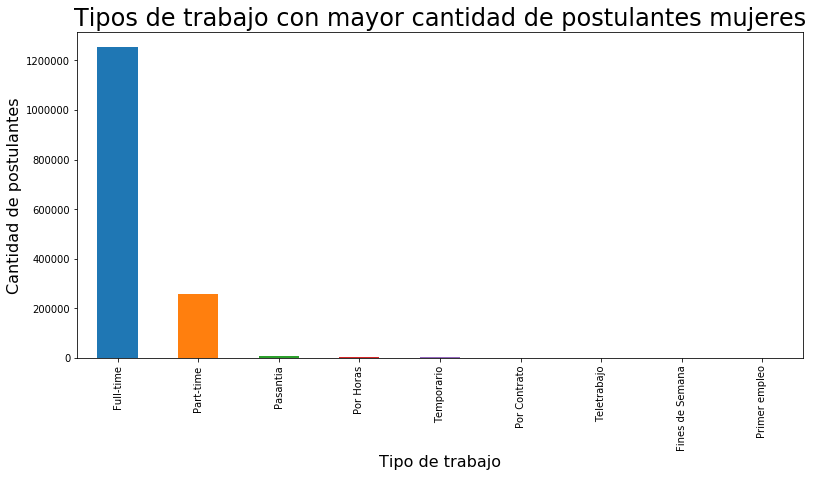

In [11]:
fig = plt.figure()

filtered=postulantes_genero_avisos.loc[(postulantes_genero_avisos.sexo=='FEM')]

ax = filtered['tipo_de_trabajo'].value_counts().plot(kind='bar',figsize=(13,6));

plt.title('Tipos de trabajo con mayor cantidad de postulantes mujeres', fontsize=24)

ax.set_xlabel('Tipo de trabajo', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes', fontsize= 16);

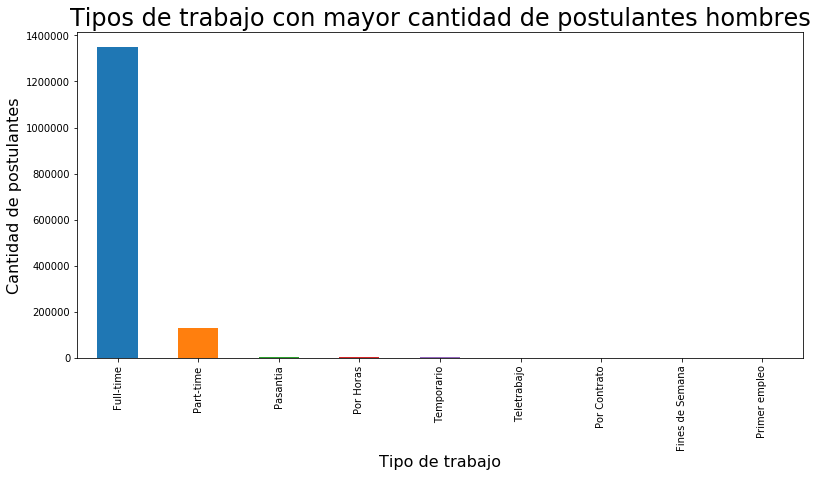

In [12]:
fig = plt.figure()

filtered=postulantes_genero_avisos.loc[(postulantes_genero_avisos.sexo=='MASC')]

ax = filtered['tipo_de_trabajo'].value_counts().plot(kind='bar',figsize=(13,6));

plt.title('Tipos de trabajo con mayor cantidad de postulantes hombres', fontsize=24)

ax.set_xlabel('Tipo de trabajo', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes', fontsize= 16);

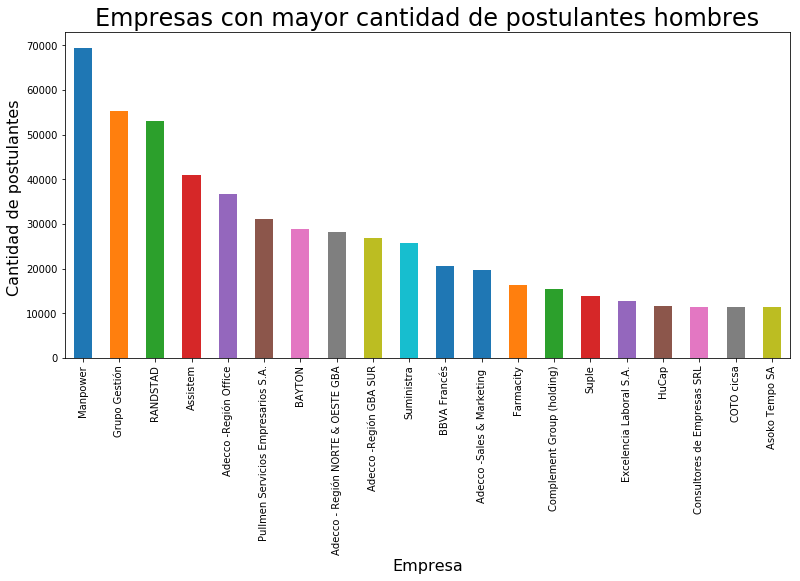

In [14]:
fig = plt.figure()

filtered=postulantes_genero_avisos.loc[(postulantes_genero_avisos.sexo=='MASC')]

ax = filtered['denominacion_empresa'].value_counts().head(20).plot(kind='bar',figsize=(13,6));

plt.title('Top 20 empresas con mayor cantidad de postulantes hombres', fontsize=24)

ax.set_xlabel('Empresa', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes ', fontsize= 16);

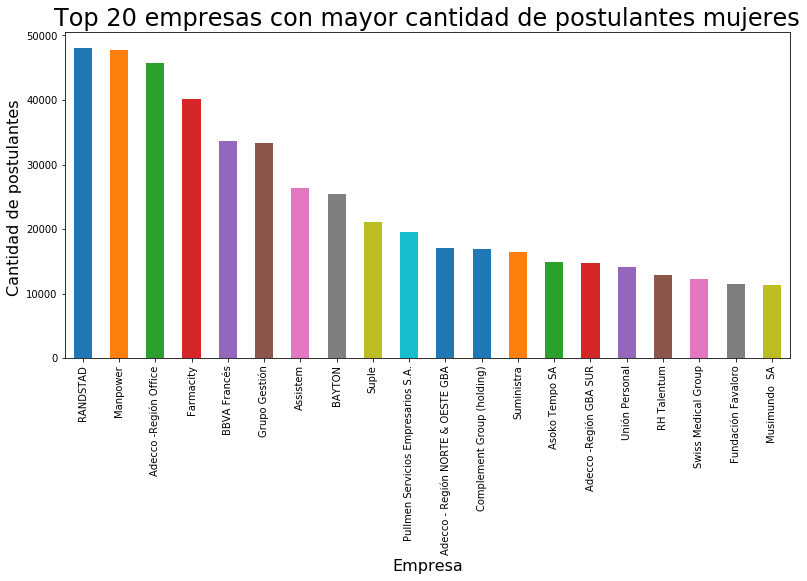

In [16]:
fig = plt.figure()

filtered=postulantes_genero_avisos.loc[(postulantes_genero_avisos.sexo=='FEM')]

ax = filtered['denominacion_empresa'].value_counts().head(20).plot(kind='bar',figsize=(13,6));

plt.title('Top 20 empresas con mayor cantidad de postulantes mujeres', fontsize=24)

ax.set_xlabel('Empresa', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes ', fontsize= 16);

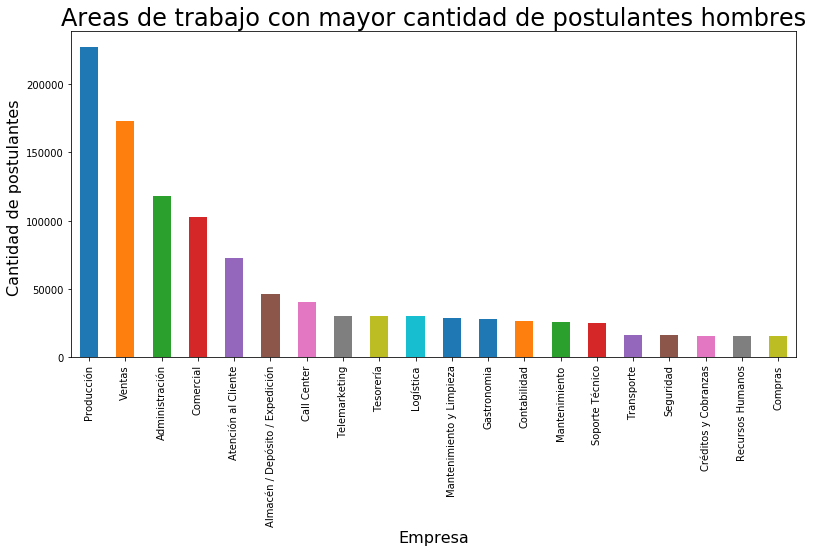

In [17]:
fig = plt.figure()

filtered=postulantes_genero_avisos.loc[(postulantes_genero_avisos.sexo=='MASC')]

ax = filtered['nombre_area'].value_counts().head(20).plot(kind='bar',figsize=(13,6));

plt.title('Areas de trabajo con mayor cantidad de postulantes hombres', fontsize=24)

ax.set_xlabel('Area', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes ', fontsize= 16);

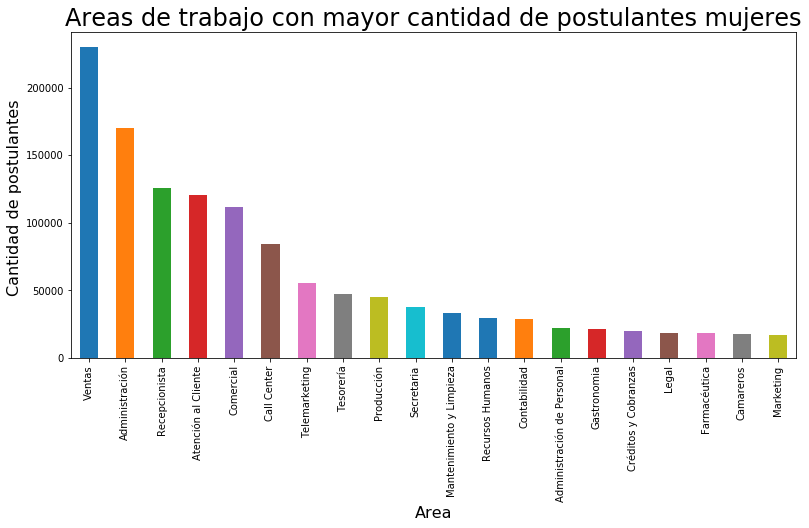

In [18]:
fig = plt.figure()

filtered=postulantes_genero_avisos.loc[(postulantes_genero_avisos.sexo=='FEM')]

ax = filtered['nombre_area'].value_counts().head(20).plot(kind='bar',figsize=(13,6));

plt.title('Areas de trabajo con mayor cantidad de postulantes mujeres', fontsize=24)

ax.set_xlabel('Area', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes ', fontsize= 16);

# Top 5 - Postulaciones x Area de trabajo

In [ ]:
df = pd.merge(postulaciones, avisos_detalle, on='idaviso', how='inner')

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

plt.title('Postulaciones x Area (Top 5)')
ax.set_xlabel('Area')
ax.set_ylabel('Postulaciones')
df['nombre_area'].value_counts().head().plot(kind='bar')

plt.show()

In [ ]:
#este me tira un memory error
fig = plt.figure()
ax = fig.add_subplot(111)

plt.title('Postulaciones x Zona (Dentro de ventas)')
ax.set_xlabel('Zona')
ax.set_ylabel('Postulaciones')
merge2[merge2['nombre_area'] == 'Ventas']['nombre_zona'].value_counts().plot(kind='bar')
plt.show()

# Tasa de conversion de avisos (postulaciones / visitas)

Agrego esto que puso natalia en Piazza para que lo lean. Por lo que vi, en el csv de vistas no hay idUsuario null, por lo que entiendo que en este csv solo tenemos las vistas de los usuarios que estaba logeados antes de postularse.
Entonces puede pasar que tengamos postulaciones de usuarios pero que no tengamos las vistas previas a la postulacion.
Tambien tenemos que chequear y limpiar que en las vistas seguramente hay usuarios duplicados.

Natalia Golmar 10 hours ago
Hola

Consulte este tema con la gente de Navent, y les comparto algunas respuestas:

- Las vistas se guardan solo para usuarios logueados en el sistema? No, se guardan todas las vistas y si el usuario no está logueado en el registro no tiene el campo idUsuario (no recuerdan si filtraron y nos enviaron sólo las vistas con usuarios, pero si es asi entiendan que seguro hay vistas sin idUsuario para los avisos)
- Es posible mirar avisos sin loguearse? Si
- Es posible que el usuario se loguee solo al postularse, y no quede registado el acceso al aviso como vista? Si
- Si un usuario visita mas de una vez un aviso, se registra cada vista o se registra solo la 1ra? Todas

In [ ]:
postulaciones.head()

In [ ]:
#me quedo con la fecha de la postulacion
postulaciones['fechapostulacion'] = postulaciones['fechapostulacion'].dt.date

In [ ]:
#lo mismo para el timestamp
visitas['timestamp'] = visitas['timestamp'].dt.date

In [ ]:
postulaciones_validas = postulaciones[postulaciones['fechapostulacion'].isin(visitas['timestamp'])]

In [ ]:
visitas_validas = visitas[visitas['timestamp'].isin(postulaciones_validas['fechapostulacion'])]

In [ ]:
visitas_validas['timestamp'].value_counts()

In [ ]:
postulaciones_validas['fechapostulacion'].value_counts()

In [ ]:
postulaciones_validas = postulaciones_validas.rename(columns={'fechapostulacion':'fecha'})
postulaciones_validas.head()

In [ ]:
visitas_validas = visitas_validas.rename(columns={'idAviso':'idaviso','timestamp':'fecha'})
visitas_validas.head()

In [ ]:
print (postulaciones_validas.shape)
print (visitas_validas.shape)